
># Project: Salary Classification

## Table of Contents
<ul>
<li><a href="#libraries">Import Libraries</a></li>
<li><a href="#DBC">Import Data And Show It before Cleaning </a></li>
<li><a href="#cleannig">Data Cleannig</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='libraries'></a>
### import libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import seaborn as sns

<a id='DBC'></a>
### Import Data And Show it Before Cleaning

In [72]:
df=pd.read_csv("dataset.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<a id='cleannig'></a>
### cheack cleaning

In [73]:
df.isnull().sum() ## return the sum of null value

df.duplicated().sum() ## cheak if tere a duplicated value 
df = df.drop_duplicates() # remove duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   gender          32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### handling noise data 

In [74]:
df.replace(" ?", np.nan, inplace=True)
df.fillna("other", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19308\909937924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(" ?", np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19308\909937924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("other", inplace=True)


### Age Distribution + Handeling Outlier

C:\Users\User\AppData\Local\Temp\ipykernel_19308\381243937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], kde=True, ax=ax[0])


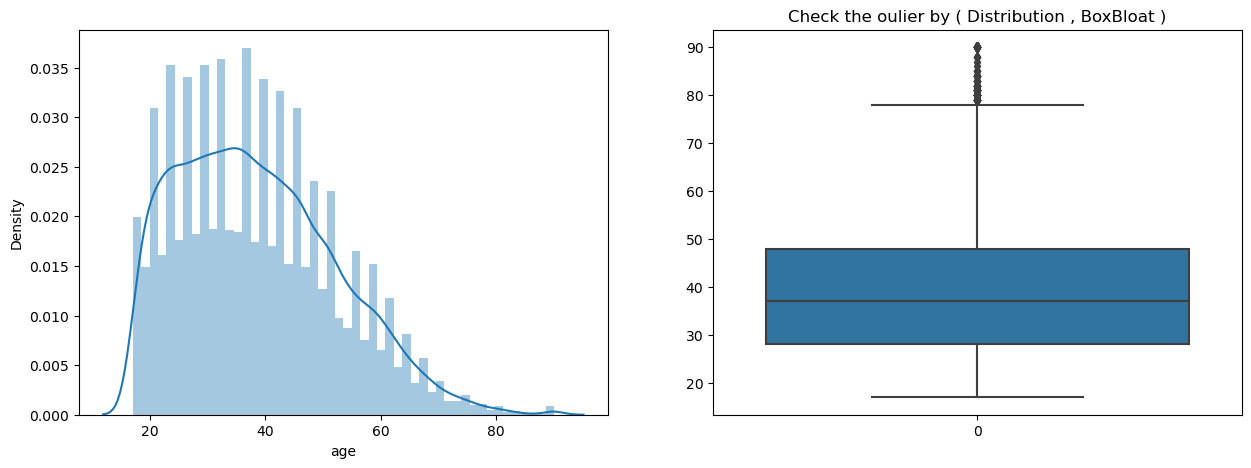

In [75]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df["age"], kde=True, ax=ax[0])
sns.boxplot(df["age"], ax=ax[1])

plt.title("Check the oulier by ( Distribution , BoxBloat )")
plt.show()

In [76]:
outliers = []
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
    
for value in df["age"]:
    if value > upper_bound or value < lower_bound or value <=0:
        outliers.append(value)
            
print(f"age has {len(outliers)} outliers")

age has 142 outliers


In [77]:
mn = int(df["age"].median())
   
for value in df["age"]:
    if value > upper_bound or value < lower_bound:
        df["age"] = df["age"].replace(value, mn) #(replace(current_value, new_value))

C:\Users\User\AppData\Local\Temp\ipykernel_19308\1861940508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].replace(value, mn) #(replace(current_value, new_value))


<a id='eda'></a>
## Exploratory Data Analysis

#### the insights that we will answer on it 
* <a href="#1st">what is the relationship between age and working hours ?</a></li>
* <a href="#2nd"> what is the highest country in education ?</a></li>
* <a href="#3rd">what is the correlation between work class and gender ?</a></li>
* <a href="#4th">What is the the largest workclass in data ?</a></li>
* <a href="#5th">what is the higest salary depend on workclass ?</a></li>
* <a href="#6th">what is the relation betwwen the degree of education and salary ?</a></li>
* <a href="#7th">what is the middle of age ?</a></li>
* <a href="#8th">what is the largest type of education degree ?</a></li>

#### Visualization charts
* Scatter Plot
* Barh Chart
* Line Chart
* countplot
* Box Plot
* Bie Chart


<a id='1st'></a>
what is the relationship between age and working hours ? <br>
==> the realation is when the age is increased the work hour is decreased

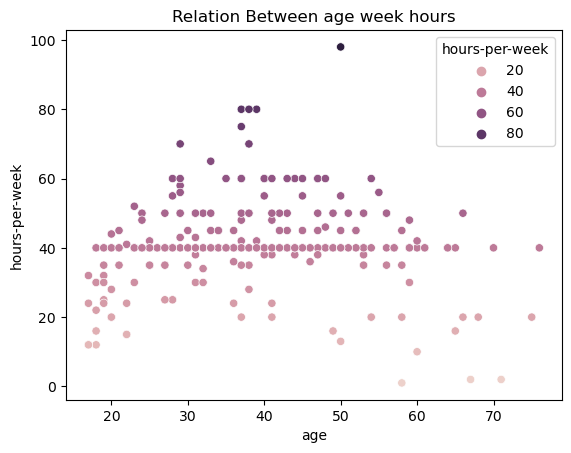

In [78]:
a = df
df = df.head(300)
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='hours-per-week')
# hue ==> customiz5e color and make catogrie by it 
plt.title("Relation Between age week hours")
plt.show()

<a id='2nd'></a> 
what is the highest country in education-degree ? <br>
==> the highest in education is the Ecudor

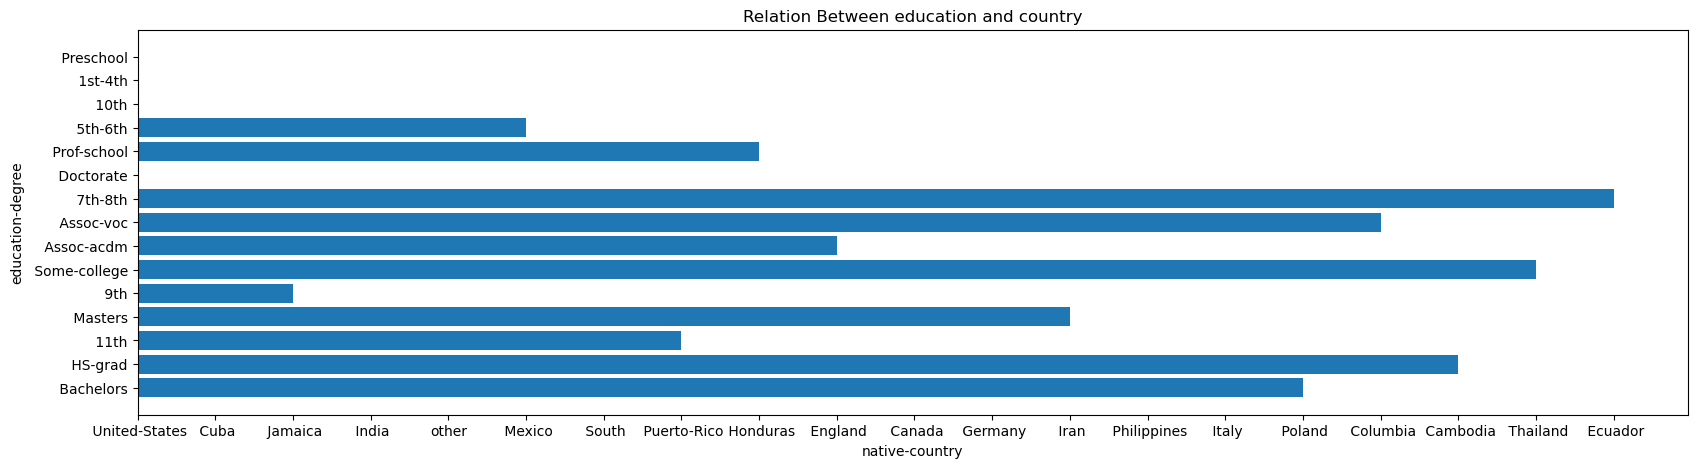

In [79]:
plt.figure(figsize=(20 , 5)) 

plt.barh(df['education'], df['native-country'])
plt.title("Relation Between education and country")

plt.xlabel('native-country')
plt.ylabel('education-degree')
plt.show()

<a id='3rd'></a>
what is the correlation between work class and gender ? <br>
==> Female in all workclasses is negative <br>
==> male in all workclasses is positive 

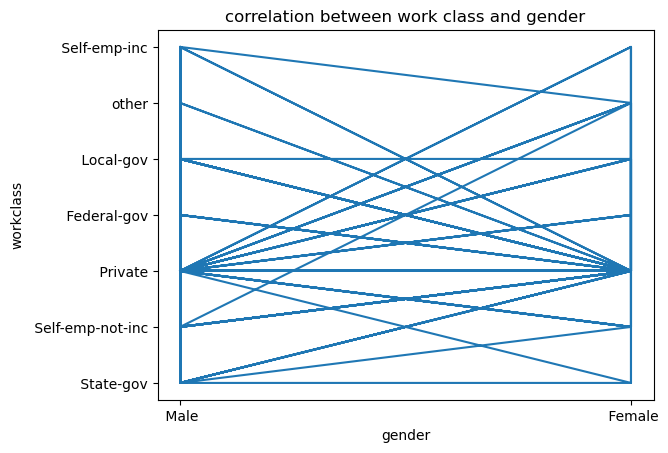

In [80]:
plt.plot(df['gender'] , df['workclass']  )

plt.title("correlation between work class and gender")
plt.xlabel('gender')
plt.ylabel('workclass')

plt.show()

<a id='4th'></a>
What is the the largest workclass in data ?<br>
==> the largest work class is privite 

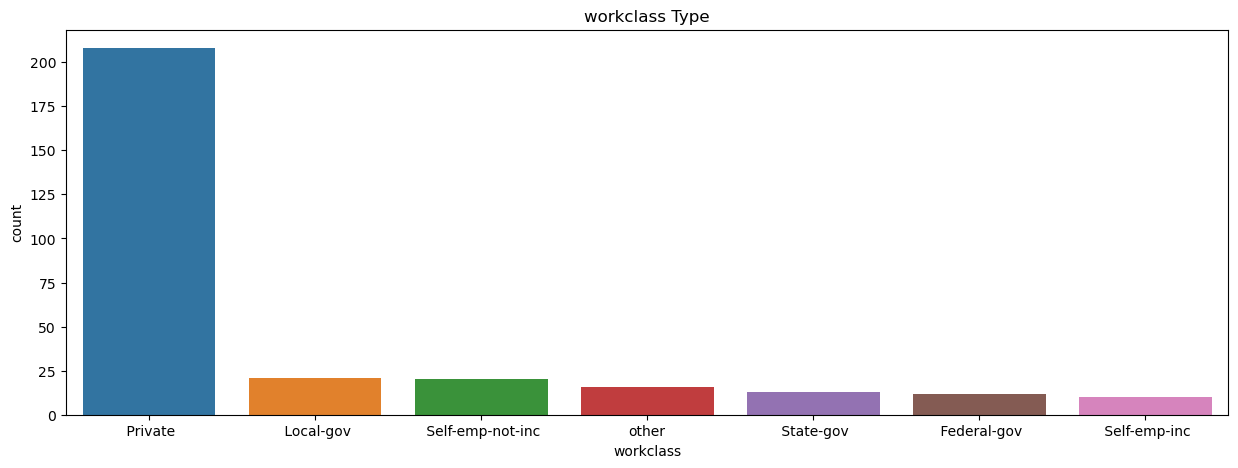

In [81]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data = df, x='workclass', order=df["workclass"].value_counts().index)
plt.title("workclass Type")
plt.show()

<a id='5th'></a>
what is the higest salary depend on workclass ? <br>
==> the biggest sallary ( <= 50 or > 50 ) is private

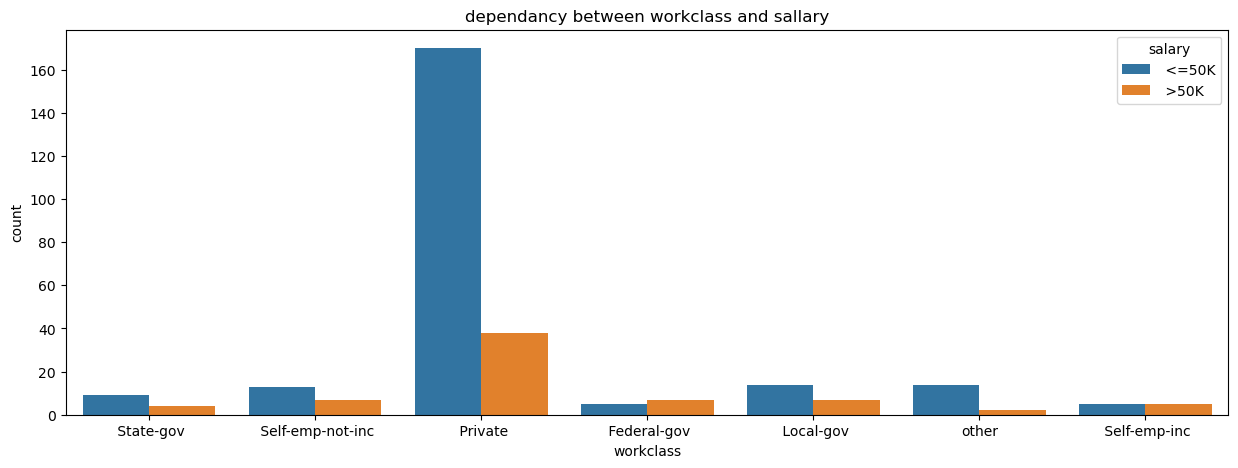

In [82]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data = df, x='workclass', hue="salary")
plt.title("dependancy between workclass and sallary")
plt.show()

<a id='6th'></a>
what is the relation betwwen the education-degree and salary ? <br>
==> Hs Grauted is the largest in the <= 50  <br>
==> Bachelors is the largest in the >50

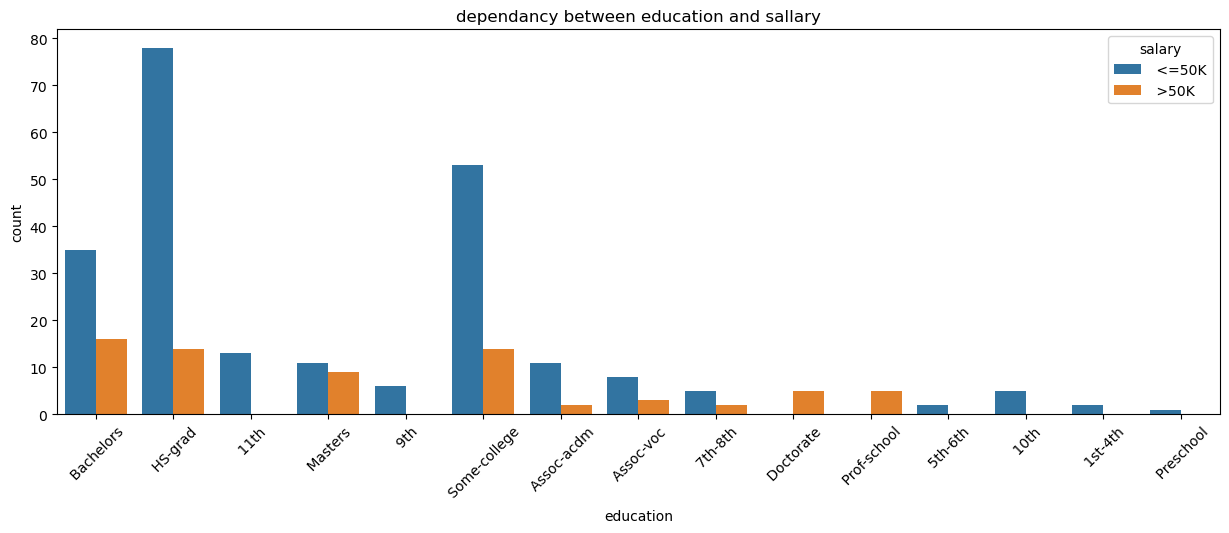

In [83]:
fig = plt.figure(figsize=(15,5))
g = sns.countplot(data = df, x='education', hue="salary")
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.title("dependancy between education and sallary")
plt.show()

<a id='7th'></a>
what is the middle of age ? <br>
==> the middle age in data = 35

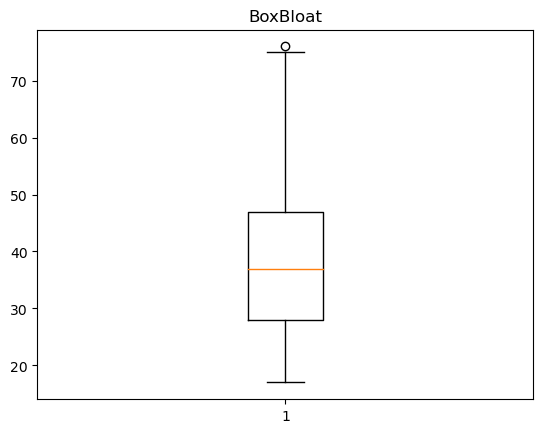

In [84]:
plt.boxplot(df["age"])
plt.title("BoxBloat")
plt.show()

median = 35 <br>
Q3 = 48 <br>
Q1 = 28 <br>
in age we have one value that outlier

<a id='8th'></a>

what is the largest type of education degree ?
<br> ==> the largest type in education is Bachelors then HS-Gratated
<a id='bie-chart'></a>

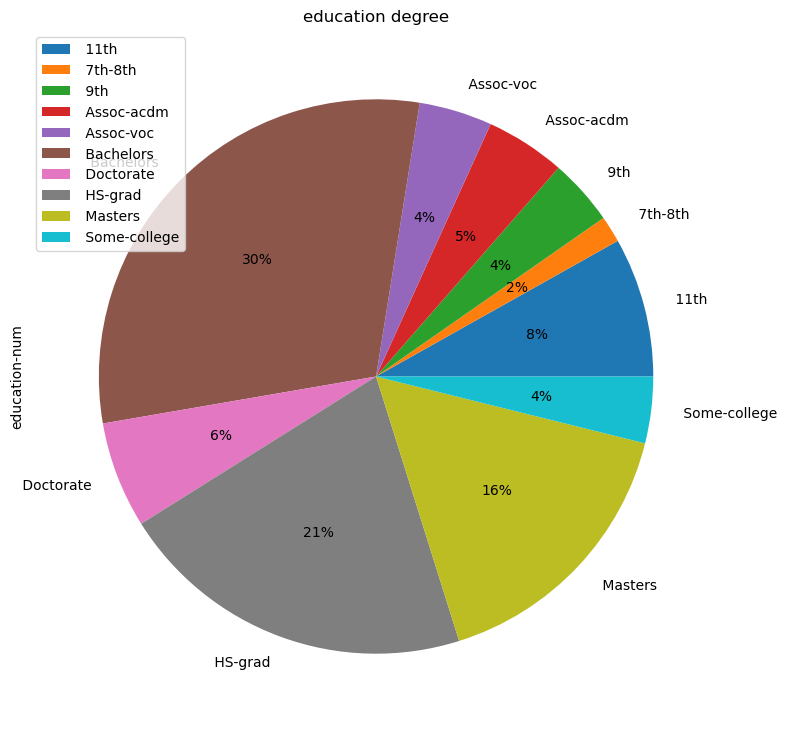

In [85]:
y = df.head(25)
y.groupby(['education']).sum().plot(kind='pie', y='education-num' , autopct='%1.0f%%',figsize=(9,9))
plt.title("education degree")
plt.show()

<a id='ML'></a>
## Machine Learning

* <a href="#ml1"> Logistic Regression</a></li>
* <a href="#ml2"> Random Forest</a></li>

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [87]:
X = a [["hours-per-week" , "age" , "education-num"]]
y = a ["salary"]

# spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=.3, random_state=101)

def report (x,z,accuracy):
    print (f"the accuracy of model = {accuracy* 100}")
    print ("ــــــــــــــــــــــــــــــــــــــــ")
    print()
    print(classification_report(x, z))
    print ("ــــــــــــــــــــــــــــــــــــــــ")

<a id='ml1'></a>

Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=0, max_iter=X.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=32537, random_state=0)

the accuracy of model = 79.26654374103667
ــــــــــــــــــــــــــــــــــــــــ

              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87      7428
        >50K       0.62      0.34      0.44      2334

    accuracy                           0.79      9762
   macro avg       0.72      0.64      0.65      9762
weighted avg       0.77      0.79      0.77      9762

ــــــــــــــــــــــــــــــــــــــــ


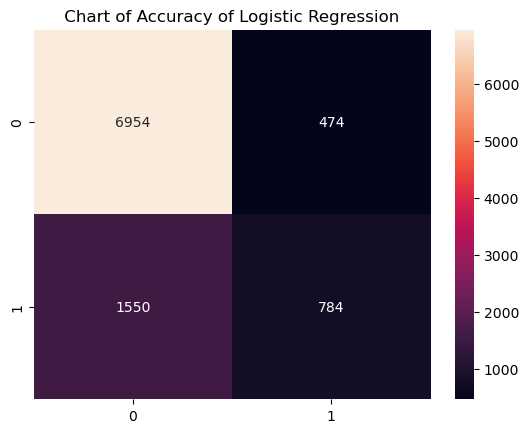

In [89]:
y_pred = logR.predict(X_test)  ## PREDICT
cm = confusion_matrix(y_test, y_pred) ## calculate accuracy

accuracy = (cm[0,0] + cm[1,1]) / cm.sum() # percentage
report (y_test , y_pred , accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g') # the chart that have perdict
plt.title(" Chart of Accuracy of Logistic Regression ")
plt.show()

<a id='ml2'></a>

Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

the accuracy of model = 78.20118828108994
ــــــــــــــــــــــــــــــــــــــــ

              precision    recall  f1-score   support

       <=50K       0.83      0.90      0.86      7428
        >50K       0.56      0.39      0.46      2334

    accuracy                           0.78      9762
   macro avg       0.69      0.65      0.66      9762
weighted avg       0.76      0.78      0.77      9762

ــــــــــــــــــــــــــــــــــــــــ


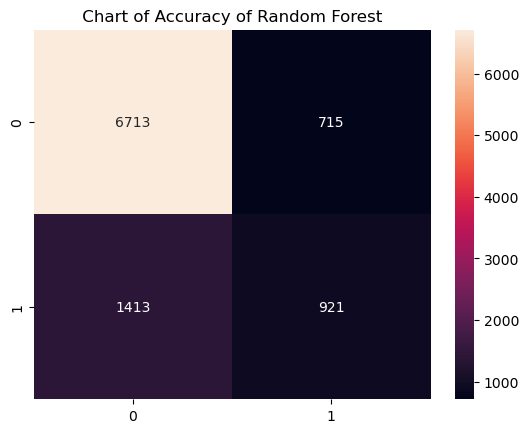

In [91]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
report (y_test , y_pred , accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g')
plt.title(" Chart of Accuracy of Random Forest ")
plt.show()

<a href="#conclusions"></a>
## coclsution 

##### Exploratory Data Analysis
* ==> the realation is when the age is increased the work hour is decreased
* ==> the highest in education is the Ecudor
* ==> Female in all workclasses is negative & male is positive 
* ==> the largest work class is privite 
* ==> the biggest sallary ( <= 50 or > 50 ) is private
* ==> Hs Grauted is the largest in the <= 50 & Bachelors is the largest in the >50
* ==> the middle age in data = 35
* ==> the largest type in education is Bachelors then HS-Gratated

##### Machine learning 
the Logistic Regression is perfect becaue the accuracy = 79.26654374103667
